## 🎓 **Aula sobre: Python e Estatística — Distribuição Normal, Binomial e de Poisson**

<br>

### 🧭 Sumário da Aula

| # | Sub-tópico                         | Tempo Estimado | Complexidade |
|---|------------------------------------|----------------|--------------|
| 1 | 🧠 Ficha de Revisão Rápida         | ~1 min         | ⭐           |
| 2 | 🔬 Mergulho Profundo               | ~15 min        | ⭐⭐⭐⭐       |
| 3 | 💻 Exemplos de Mercado             | ~10 min        | ⭐⭐⭐        |
| 4 | 🕸️ Profundezas e Conexões          | ~3 min         | ⭐⭐         |
| 5 | 🚀 Ação e Verificação               | ~5 min         | ⭐⭐         |
| 6 | 🌊 Mergulhos Adicionais Opcionais   | Opcional       | ⭐⭐⭐⭐      |

<br>

---
<br>


### 1. 🧠 Ficha de Revisão Rápida | (O Essencial)

<br>

> - **Distribuição Normal:** curva em sino definida pela *pdf* (*probability density function*).  
>   * A *pdf* diz a densidade de probabilidade em cada ponto.  
> - **Distribuição Binomial:** conta sucessos em *n* ensaios com probabilidade *p*, usa *pmf* (*probability mass function*).  
>   * A *pmf* dá a probabilidade de exatamente *k* sucessos.  
> - **Distribuição de Poisson:** modela eventos raros num intervalo fixo com taxa λ, também via *pmf*.  
>   * Útil quando *n* é grande e *p* pequeno.  
> - **CDF (Cumulative Distribution Function):** probabilidade acumulada até um valor.  
> - **Parâmetros chave:**  
>   - Normal: média (μ), desvio-padrão (σ)  
>   - Binomial: ensaios (n), probabilidade de sucesso (p)  
>   - Poisson: taxa de eventos (λ)  

<br>


### 2. 🔬 Mergulho Profundo | (Os Detalhes)

<br>

#### **🎯 O Conceito Central**  
A **distribuição normal** para variável contínua tem *pdf*  
\[
f(x)=\frac{1}{\sqrt{2\pi}\,\sigma}\,\exp\!\bigl[-\tfrac{(x-\mu)^2}{2\sigma^2}\bigr]
\]  
A **binomial** para variáveis discretas usa *pmf*  
\[
P(X=k)=\binom{n}{k}p^k(1-p)^{\,n-k}
\]  
A **Poisson** é outra *pmf*  
\[
P(X=k)=\frac{e^{-\lambda}\,\lambda^k}{k!}
\]  
A **CDF** acumula essas probabilidades até um dado valor, seja integrando a *pdf* (normal) ou somando a *pmf* (discretas).

<br>

#### **🔗 Analogia de Data Science**  
- **Normal:** alturas de pessoas — maioria próxima da média, poucos extremos.  
- **Binomial:** lançar uma moeda *n* vezes e contar quantas vezes deu “cara”.  
- **Poisson:** contar quantos pedidos chegam por minuto num site movimentado.

<br>


### **💻 Exemplos de Mercado (Abrangentes)**


#### **Nível Simples: Histograma e PDF da Distribuição Normal**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# “Leia CSV e selecione delivery_time.”
df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
data = df['delivery_time'].dropna()

# “Ajuste Normal: calcule média e desvio.”
mu, sigma = data.mean(), data.std()

# “Plote histograma normalizado e curva normal.”
count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6)
x = np.linspace(bins.min(), bins.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--')
plt.title('Delivery Time com PDF Normal')
plt.xlabel('Tempo de entrega (min)')
plt.show()


In [1]:
# Pratique seu código aqui!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df = pd.read_csv("C:/Users/bianc/OneDrive/Documents/1-Estudos/2-DNC/1-Data Science/1-Material/Materia7-EstatisticaComPython/EstatísticaDescritiva/ifood-restaurants-february-2021.csv", sep=",", header=0)

In [4]:
data = df["delivery_time"].dropna()

In [8]:
mu, sigma = data.mean(), data.std()
print(f"Média: {mu:.2f}\nDesvio Padão: {sigma:.2f}")

Média: 47.43
Desvio Padão: 19.66


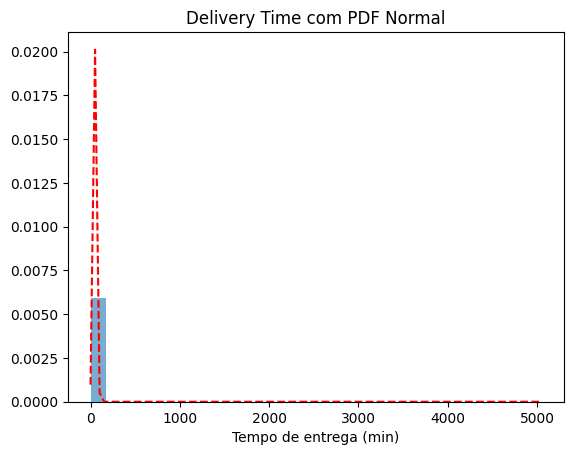

In [14]:
count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6)
x = np.linspace(bins.min(), bins.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), "r--")
plt.title("Delivery Time com PDF Normal")
plt.xlabel('Tempo de entrega (min)')
plt.show()

* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  import pandas as pd                                # carrega pandas  
  import numpy as np                                 # carrega numpy  
  import matplotlib.pyplot as plt                    # carrega matplotlib  
  from scipy.stats import norm                       # carrega distribuição normal  

  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')  
  data = df['delivery_time'].dropna()                # extrai coluna sem nulos  

  mu, sigma = data.mean(), data.std()                # média e desvio padrão  

  count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6)  
  x = np.linspace(bins.min(), bins.max(), 100)  
  plt.plot(x, norm.pdf(x, mu, sigma), 'r--')         # sobrepõe PDF  
  plt.title('Delivery Time com PDF Normal')  
  plt.xlabel('Tempo de entrega (min)')  
  plt.show()  
  ```

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo | Expressão                         | Saída                | O que faz?                                 |
  |:-----:|:----------------------------------|:---------------------|:-------------------------------------------|
  | 1     | `data`                            | Series               | Valores de tempo de entrega                |
  | 2     | `mu, sigma`                       | floats               | Parâmetros da normal (média, desvio)       |
  | 3     | `plt.hist(..., density=True)`     | histograma densidade | Histograma normalizado                     |
  | 4     | `norm.pdf(x, mu, sigma)`          | array                | Valores da curva de densidade              |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  Imagine empilhar blocos conforme o tempo de entrega; a curva normal é a forma suave que “encaixa” no topo desses blocos.

* **Cenário de Mercado:**  
  - Em **otimização de logística**, compare a distribuição real de tempos com a curva ideal (normal) para detectar gargalos.  

* **Boas Práticas:**  
  - **Afirmação:** “Sempre ajuste e plote a *pdf* para verificar adequação.”  
    - **Porquê:** Revela desvios sistemáticos como caudas pesadas.  
    - **Analogia:** É como testar se um molde se encaixa perfeitamente na peça antes da produção.


#### **Nível Intermediário: PMF da Distribuição Binomial**


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import binom

# “Leia CSV e calcule probabilidade de entrega rápida.”
df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
p = (df['delivery_time'] <= 30).mean()            # P(sucesso em ≤30min)
n = 5                                             # número de ensaios
k = np.arange(0, n+1)

# “Calcule PMF para cada k.”
pmf = binom.pmf(k, n, p)

for ki, prob in zip(k, pmf):
    print(f"P(X={ki}): {prob:.3f}")


In [18]:
# Pratique seu código aqui!
import pandas as pd
import numpy as np
from scipy.stats import binom

In [15]:
df = pd.read_csv("C:/Users/bianc/OneDrive/Documents/1-Estudos/2-DNC/1-Data Science/1-Material/Materia7-EstatisticaComPython/EstatísticaDescritiva/ifood-restaurants-february-2021.csv", sep=",", header=0)

In [16]:
p = (df["delivery_time"] <= 30).mean()
n = 5
k = np.arange(0, n+1)

In [20]:
pmf = binom.pmf(k, n, p)

In [21]:
for ki, prob in zip(k, pmf):
    print(f"P(X={ki}): {prob:.3f}")

P(X=0): 0.404
P(X=1): 0.401
P(X=2): 0.159
P(X=3): 0.032
P(X=4): 0.003
P(X=5): 0.000


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  import pandas as pd  
  import numpy as np  
  from scipy.stats import binom  

  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')  
  p = (df['delivery_time'] <= 30).mean()            # taxa de sucesso  
  n = 5                                             # ensaios simulados  
  k = np.arange(0, n+1)                            # possíveis sucessos  

  pmf = binom.pmf(k, n, p)                         # calcula PMF  

  for ki, prob in zip(k, pmf):
      print(f"P(X={ki}): {prob:.3f}")  
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo | Expressão                                 | Saída     | O que faz?                 |
  |:-----:|:------------------------------------------|:----------|:---------------------------|
  | 1     | `(df['delivery_time']<=30).mean()`        | float     | Estima p de sucesso        |
  | 2     | `binom.pmf(k,n,p)`                        | array     | PMF da binomial            |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  É como simular 5 pedidos e contar quantas entregas rápidas (“sucessos”) ocorrem em cada cenário.

* **Cenário de Mercado:**  
  - Em **metas de SLA**, prever quantos pedidos chegarão dentro do prazo em pacotes de 5 facilita planejamento de equipes.  

* **Boas Práticas:**  
  - **Afirmação:** “Valide *n* e *p* com dados reais.”  
    - **Porquê:** Parâmetros incorretos distorcem probabilidades.  
    - **Analogia:** É como calibrar uma balança antes de pesar ingredientes.


#### **Nível Avançado: PMF da Distribuição de Poisson**


In [ ]:
import numpy as np
from scipy.stats import poisson

# “Suponha taxa média de 20 pedidos/dia por restaurante.”
lam = 20
k = np.arange(0, 41)

# “Calcule PMF de Poisson.”
pmf = poisson.pmf(k, lam)

for ki, prob in zip(k, pmf):
    print(f"P(X={ki}): {prob:.3f}")


In [22]:
# Pratique seu código aqui!
import numpy as np
from scipy.stats import poisson

In [23]:
lam = 20
k = np.arange(0, 41)

In [24]:
pmf = poisson.pmf(k, lam)

In [25]:
for ki, prob in zip(k, pmf):
    print(f"P(X={ki}): {prob:.3f}")

P(X=0): 0.000
P(X=1): 0.000
P(X=2): 0.000
P(X=3): 0.000
P(X=4): 0.000
P(X=5): 0.000
P(X=6): 0.000
P(X=7): 0.001
P(X=8): 0.001
P(X=9): 0.003
P(X=10): 0.006
P(X=11): 0.011
P(X=12): 0.018
P(X=13): 0.027
P(X=14): 0.039
P(X=15): 0.052
P(X=16): 0.065
P(X=17): 0.076
P(X=18): 0.084
P(X=19): 0.089
P(X=20): 0.089
P(X=21): 0.085
P(X=22): 0.077
P(X=23): 0.067
P(X=24): 0.056
P(X=25): 0.045
P(X=26): 0.034
P(X=27): 0.025
P(X=28): 0.018
P(X=29): 0.013
P(X=30): 0.008
P(X=31): 0.005
P(X=32): 0.003
P(X=33): 0.002
P(X=34): 0.001
P(X=35): 0.001
P(X=36): 0.000
P(X=37): 0.000
P(X=38): 0.000
P(X=39): 0.000
P(X=40): 0.000


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  import numpy as np  
  from scipy.stats import poisson  

  lam = 20                                          # média de eventos  
  k = np.arange(0, 41)                              # possíveis contagens  

  pmf = poisson.pmf(k, lam)                         # calcula PMF  

  for ki, prob in zip(k, pmf):
      print(f"P(X={ki}): {prob:.3f}")  
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo | Expressão               | Saída           | O que faz?                             |
  |:-----:|:------------------------|:----------------|:---------------------------------------|
  | 1     | `poisson.pmf(k,lam)`    | array           | PMF da Poisson                         |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  Imagine contar quantos pedidos chegam em um dia: Poisson descreve a probabilidade de “k” pedidos ocorrerem em média λ vezes.

* **Cenário de Mercado:**  
  - Em **dimensionamento de infraestrutura**, prever número de requisições orienta alocação de servidores.  

* **Boas Práticas:**  
  - **Afirmação:** “Use Poisson para eventos raros.”  
    - **Porquê:** Modela bem fenômenos de chegada independente.  
    - **Analogia:** É como contar gotas de chuva num certo período.


#### **Nível DEUS (1/3): Ajuste de Distribuições aos Dados**


In [ ]:
import pandas as pd
from scipy.stats import norm, binom, poisson

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
data = df['delivery_time'].dropna()

# Ajuste normal
mu, sigma = norm.fit(data)
print(f"Normal fit: μ={mu:.2f}, σ={sigma:.2f}")


In [ ]:
# Pratique seu código aqui!


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  import pandas as pd  
  from scipy.stats import norm  

  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')  
  data = df['delivery_time'].dropna()  

  mu, sigma = norm.fit(data)                        # estima μ e σ  
  print(f"Normal fit: μ={mu:.2f}, σ={sigma:.2f}")  
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo | Expressão       | Saída     | O que faz?                         |
  |:-----:|:----------------|:----------|:-----------------------------------|
  | 1     | `norm.fit(data)`| floats    | Estima parâmetros da normal        |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  É como ajustar o “molde” da curva normal para encaixar melhor nos dados observados.

* **Cenário de Mercado:**  
  - Em **monitoramento de tempo**, ajustar normal ajuda a definir limites de alerta (ex: 95% dos casos).


#### **Nível DEUS (2/3): Teste de Bondade de Ajuste (KS Test)**


In [ ]:
from scipy.stats import kstest

# “Teste KS para normalidade.”
stat, p = kstest(data, 'norm', args=(mu, sigma))
print(f"KS stat: {stat:.3f}, p-value: {p:.3f}")


In [ ]:
# Pratique seu código aqui!


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  from scipy.stats import kstest  

  stat, p = kstest(data, 'norm', args=(mu, sigma))  # compara amostra vs. normal
  print(f"KS stat: {stat:.3f}, p-value: {p:.3f}")  
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo | Expressão                 | Saída     | O que faz?                          |
  |:-----:|:--------------------------|:----------|:------------------------------------|
  | 1     | `kstest(...)`             | tuple     | Estatística e p-valor do teste KS   |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  É como comparar o formato da sua curva com a curva normal de referência e medir a maior diferença.


#### **Nível DEUS (3/3): Simulação Monte Carlo de Distribuições**


In [ ]:
import numpy as np

# “Monte Carlo: médias de amostras normais.”
sim_means = [np.mean(np.random.normal(mu, sigma, size=len(data))) for _ in range(1000)]
ci = np.percentile(sim_means, [2.5, 97.5])
print(f"MC Normal CI da média: [{ci[0]:.2f}, {ci[1]:.2f}]")


In [ ]:
# Pratique seu código aqui!


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  import numpy as np  

  sim_means = [
    np.mean(np.random.normal(mu, sigma, size=len(data)))
    for _ in range(1000)
  ]  
  ci = np.percentile(sim_means, [2.5,97.5])  
  print(f"MC Normal CI da média: [{ci[0]:.2f}, {ci[1]:.2f}]")  
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo   | Expressão                   | Saída        | O que faz?                         |
  |:-------:|:----------------------------|:-------------|:-----------------------------------|
  | 1       | `sim_means`                 | lista floats | Distribuição de médias simuladas   |
  | 2       | `np.percentile(...,[2.5,97.5])`| array floats| CI da média via Monte Carlo        |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  É como repetir mil vezes o experimento “coletar dados e calcular média” para ver onde a média costuma cair.

<br>


### 3. 🕸️ Profundezas e Conexões

<br>

As distribuições fundamentalizam **modelagem estatística**, **teste de hipóteses**, **simulações** e servem de base para **Machine Learning** (e.g., regressão linear, Naïve Bayes).

<br>

---
<br>


### 4. 🚀 Ação e Verificação

<br>

#### **🤔 Desafio Prático**
1. Ajuste e plote *pdf* normal para `delivery_time`.  
2. Calcule e interprete *pmf* binomial para *n*=10, *p* = P(delivery≤20 min).  
3. Simule Poisson com λ igual à média de pedidos/dia (suposto 20).  
4. Realize KS test para normalidade de `delivery_time`.  
5. Monte Monte Carlo para obter CI da média normal.

<br>

#### **❓ Pergunta de Verificação**
Quando escolher binomial em vez de Poisson para modelar contagens?

<br>

---
<br>
